In [1]:
from keras._tf_keras.keras.models import load_model

In [3]:
model = load_model("D:\OneDrive - Asia Pacific University\Degree Year 3\Sem 2\Final Year Project\Deepfake Detection System\Database\deepfake_model\CLL_att.h5")
model.compile(loss = 'binary_crossentropy', optimizer = "adam" , metrics = ["accuracy"])

In [4]:
import numpy as np

# Specify the filename of saved .npz file
filename = "D:\OneDrive - Asia Pacific University\Degree Year 3\Sem 2\Final Year Project\Detection Model Development\Dataset\FakeAVCeleb\Processed_FakeAVCeleb.npz"

# Load the data from the .npz file using np.load
data = np.load(filename)

# Access the individual data arrays from the loaded data object
avceleb_video = data['video_data']
avceleb_audio = data['audio_data']
avceleb_labels = data['encoded_labels']


In [5]:
predictions = model.predict([avceleb_video, avceleb_audio])

# Convert probabilities to class labels (0 for deepfake, 1 for real)
predicted_labels = (predictions > 0.5).astype(int)

539/539 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(avceleb_labels, predicted_labels, target_names=['Fake', 'Real'])
print(report)

              precision    recall  f1-score   support

        Fake       0.73      0.60      0.66      8618
        Real       0.66      0.78      0.71      8618

    accuracy                           0.69     17236
   macro avg       0.70      0.69      0.69     17236
weighted avg       0.70      0.69      0.69     17236



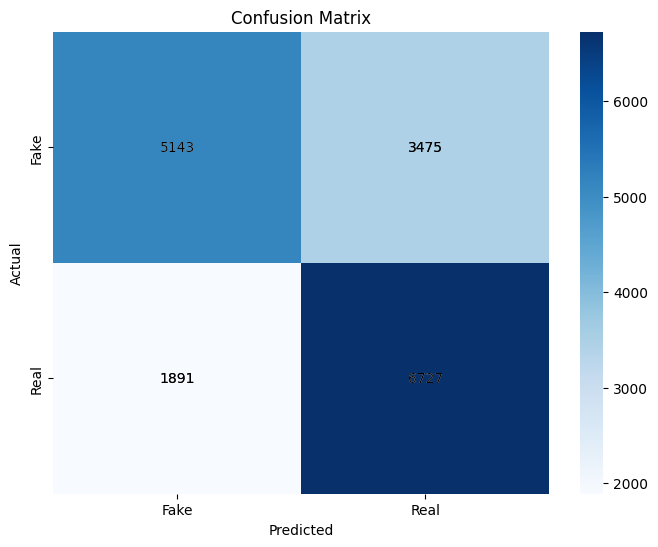

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Generate the confusion matrix
cm = confusion_matrix(avceleb_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j+0.5, i+0.5, str(cm[i, j]),
                 ha="center", va="center", color="black" if cm[i, j] > cm.max()/2 else "black")
        
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()